# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [2]:
genome_ids = ['HG01269', 'HG01498', 'HG01356', 'HG01125', 'HG01342', 'HG01375', 'HG01383', 'HG01479', 'HG01447', 'HG01121', 'HG01488', 'HG01468', 'HG01345', 'HG01550', 'HG01136', 'HG01112', 'HG01140', 'HG01369', 'HG01250', 'HG01431', 'HG01384', 'HG01280', 'HG01390', 'HG01485', 'HG01257', 'HG01491', 'HG01365', 'HG01357', 'HG01348', 'HG01142', 'HG01432', 'HG01456', 'HG01133', 'HG01148', 'HG01260', 'HG01360', 'HG01455', 'HG01139', 'HG01275', 'HG01130', 'HG01149', 'HG01556', 'HG01378', 'HG01465', 'HG01440', 'HG01489', 'HG01372', 'HG01443', 'HG01389', 'HG01486', 'HG01254', 'HG01497', 'HG01551', 'HG01122', 'HG01461', 'HG01359', 'HG01354', 'HG01363', 'HG01134', 'HG01350', 'HG01277', 'HG01494', 'HG01464', 'HG01351', 'HG01435', 'HG01131', 'HG01495', 'HG01259', 'HG01353', 'HG01284', 'HG01362', 'HG01377', 'HG01271', 'HG01366', 'HG01272', 'HG01119', 'HG01281', 'HG01251', 'HG01441', 'HG01438', 'HG01444', 'HG01256', 'HG01344', 'HG01253', 'HG01374', 'HG01459', 'HG01113', 'HG01474', 'HG01462', 'HG01341', 'HG01124', 'HG01437', 'HG01492', 'HG01137']

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [4]:
root_dir = join(Path.home(),"cp_als/populations")

In [5]:
infile = join(root_dir,"output/CLM/all.csv")
infile

'/Users/emilyvu/cp_als/populations/output/CLM/all.csv'

In [6]:
df = pd.read_csv(infile)

In [7]:
df = df[genome_ids + ['gene']]
df.head()

,HG01269,HG01498,HG01356,HG01125,HG01342,HG01375,HG01383,HG01479,HG01447,HG01121,...,HG01459,HG01113,HG01474,HG01462,HG01341,HG01124,HG01437,HG01492,HG01137,gene
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP


## Computer variant count per gene and per genome

In [8]:
sdf=df.groupby(["gene"]).sum()

In [9]:
sdf.head()

,HG01269,HG01498,HG01356,HG01125,HG01342,HG01375,HG01383,HG01479,HG01447,HG01121,...,HG01374,HG01459,HG01113,HG01474,HG01462,HG01341,HG01124,HG01437,HG01492,HG01137
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,21,37,31,4,13,3,4,4,36,7,...,2,2,39,23,4,6,2,21,2,5
ANG,9,13,4,1,0,3,1,8,6,1,...,1,10,9,1,13,6,5,3,9,1
ATXN2,12,13,8,9,29,11,14,9,7,10,...,13,8,160,2,16,10,17,12,8,21
C19ORF12,5,12,8,16,8,9,12,9,8,13,...,18,1,11,11,11,4,13,17,6,17
C9ORF72,2,23,23,17,11,12,26,10,17,36,...,13,25,36,11,14,33,27,10,2,22


## Compute mean99

In [10]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [11]:
mean99.head()

,0
HG01269,10.868687
HG01498,11.303030
HG01356,11.393939
HG01125,15.434343
HG01342,17.535354


In [12]:
m99 = mean99.transpose()

In [13]:
m99

,HG01269,HG01498,HG01356,HG01125,HG01342,HG01375,HG01383,HG01479,HG01447,HG01121,...,HG01374,HG01459,HG01113,HG01474,HG01462,HG01341,HG01124,HG01437,HG01492,HG01137
0,10.868687,11.30303,11.393939,15.434343,17.535354,17.343434,11.89899,12.222222,17.525253,14.727273,...,9.050505,9.353535,11.949495,15.383838,11.757576,6.848485,15.525253,9.515152,10.989899,14.222222


## Name the row "mean99" to append to the dataframe 

In [14]:
m99.index=["mean99"]

In [15]:
m99.head()

,HG01269,HG01498,HG01356,HG01125,HG01342,HG01375,HG01383,HG01479,HG01447,HG01121,...,HG01374,HG01459,HG01113,HG01474,HG01462,HG01341,HG01124,HG01437,HG01492,HG01137
mean99,10.868687,11.30303,11.393939,15.434343,17.535354,17.343434,11.89899,12.222222,17.525253,14.727273,...,9.050505,9.353535,11.949495,15.383838,11.757576,6.848485,15.525253,9.515152,10.989899,14.222222


## Compute statistics per genome, across all genes

In [16]:
genome_stats= sdf.describe()

In [17]:
genome_stats.head()

,HG01269,HG01498,HG01356,HG01125,HG01342,HG01375,HG01383,HG01479,HG01447,HG01121,...,HG01374,HG01459,HG01113,HG01474,HG01462,HG01341,HG01124,HG01437,HG01492,HG01137
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,29.888889,31.083333,31.333333,42.444444,48.222222,47.694444,32.722222,33.611111,48.194444,40.500000,...,24.888889,25.722222,32.861111,42.305556,32.333333,18.833333,42.694444,26.166667,30.222222,39.111111
std,117.286408,107.037343,127.391859,160.691442,182.690231,198.502655,122.218916,144.619556,185.648334,161.628056,...,68.509344,67.193797,97.607421,176.835003,114.923328,47.846481,183.061710,101.072110,121.105411,163.566636
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.750000,2.000000,2.000000,1.750000,2.000000,1.000000,2.000000,2.750000,...,2.000000,2.000000,1.000000,1.750000,2.000000,1.000000,2.000000,1.000000,2.000000,1.750000


### Adding new rows for genomes to show variant statistics

In [18]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [19]:
genome_stats_df

,HG01269,HG01498,HG01356,HG01125,HG01342,HG01375,HG01383,HG01479,HG01447,HG01121,...,HG01374,HG01459,HG01113,HG01474,HG01462,HG01341,HG01124,HG01437,HG01492,HG01137
ALS2,21.000000,37.000000,31.000000,4.000000,13.000000,3.000000,4.000000,4.000000,36.000000,7.000000,...,2.000000,2.000000,39.000000,23.000000,4.000000,6.000000,2.000000,21.000000,2.000000,5.000000
ANG,9.000000,13.000000,4.000000,1.000000,0.000000,3.000000,1.000000,8.000000,6.000000,1.000000,...,1.000000,10.000000,9.000000,1.000000,13.000000,6.000000,5.000000,3.000000,9.000000,1.000000
ATXN2,12.000000,13.000000,8.000000,9.000000,29.000000,11.000000,14.000000,9.000000,7.000000,10.000000,...,13.000000,8.000000,160.000000,2.000000,16.000000,10.000000,17.000000,12.000000,8.000000,21.000000
C19ORF12,5.000000,12.000000,8.000000,16.000000,8.000000,9.000000,12.000000,9.000000,8.000000,13.000000,...,18.000000,1.000000,11.000000,11.000000,11.000000,4.000000,13.000000,17.000000,6.000000,17.000000
C9ORF72,2.000000,23.000000,23.000000,17.000000,11.000000,12.000000,26.000000,10.000000,17.000000,36.000000,...,13.000000,25.000000,36.000000,11.000000,14.000000,33.000000,27.000000,10.000000,2.000000,22.000000
CHCHD10,2.000000,3.000000,1.000000,1.000000,2.000000,3.000000,1.000000,3.000000,2.000000,1.000000,...,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000
CHMP2B,11.000000,5.000000,2.000000,7.000000,8.000000,1.000000,10.000000,5.000000,6.000000,13.000000,...,4.000000,9.000000,12.000000,10.000000,5.000000,14.000000,11.000000,6.000000,10.000000,0.000000
CHRNA3,5.000000,1.000000,28.000000,19.000000,13.000000,0.000000,17.000000,19.000000,18.000000,18.000000,...,16.000000,28.000000,13.000000,21.000000,14.000000,8.000000,6.000000,28.000000,6.000000,7.000000
CREST,2.000000,3.000000,55.000000,25.000000,2.000000,2.000000,4.000000,32.000000,56.000000,83.000000,...,2.000000,80.000000,58.000000,80.000000,0.000000,80.000000,42.000000,6.000000,7.000000,82.000000
DAO,1.000000,4.000000,2.000000,3.000000,12.000000,1.000000,3.000000,0.000000,1.000000,2.000000,...,1.000000,2.000000,1.000000,10.000000,0.000000,1.000000,4.000000,2.000000,2.000000,3.000000


### Compute per gene stats

In [20]:
gene_df = sdf.transpose().describe()

In [21]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,94.0,13.861702,13.396036,0.0,3.25,6.5,22.75,55.0
ANG,94.0,4.340426,4.533159,0.0,1.00,3.0,8.00,20.0
ATXN2,94.0,24.648936,42.374345,2.0,9.00,12.0,15.00,172.0
C19ORF12,94.0,9.595745,5.277909,0.0,7.00,9.5,12.00,41.0
C9ORF72,94.0,17.574468,9.299658,0.0,11.00,15.5,24.00,37.0
CHCHD10,94.0,1.670213,0.896688,0.0,1.00,1.0,2.00,4.0
CHMP2B,94.0,9.531915,5.393549,0.0,5.25,10.0,12.75,30.0
CHRNA3,94.0,16.031915,7.651625,0.0,13.00,16.5,20.00,32.0
CREST,94.0,24.680851,31.824185,0.0,3.00,6.0,32.00,123.0


In [22]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [23]:
rdf.head()

,HG01269,HG01498,HG01356,HG01125,HG01342,HG01375,HG01383,HG01479,HG01447,HG01121,...,HG01492,HG01137,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,21,37,31,4,13,3,4,4,36,7,...,2,5,94.0,13.861702,13.396036,0.0,3.25,6.5,22.75,55.0
ANG,9,13,4,1,0,3,1,8,6,1,...,9,1,94.0,4.340426,4.533159,0.0,1.00,3.0,8.00,20.0
ATXN2,12,13,8,9,29,11,14,9,7,10,...,8,21,94.0,24.648936,42.374345,2.0,9.00,12.0,15.00,172.0
C19ORF12,5,12,8,16,8,9,12,9,8,13,...,6,17,94.0,9.595745,5.277909,0.0,7.00,9.5,12.00,41.0
C9ORF72,2,23,23,17,11,12,26,10,17,36,...,2,22,94.0,17.574468,9.299658,0.0,11.00,15.5,24.00,37.0


In [24]:
rdf

,HG01269,HG01498,HG01356,HG01125,HG01342,HG01375,HG01383,HG01479,HG01447,HG01121,...,HG01492,HG01137,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,21,37,31,4,13,3,4,4,36,7,...,2,5,94.0,13.861702,13.396036,0.0,3.25,6.5,22.75,55.0
ANG,9,13,4,1,0,3,1,8,6,1,...,9,1,94.0,4.340426,4.533159,0.0,1.00,3.0,8.00,20.0
ATXN2,12,13,8,9,29,11,14,9,7,10,...,8,21,94.0,24.648936,42.374345,2.0,9.00,12.0,15.00,172.0
C19ORF12,5,12,8,16,8,9,12,9,8,13,...,6,17,94.0,9.595745,5.277909,0.0,7.00,9.5,12.00,41.0
C9ORF72,2,23,23,17,11,12,26,10,17,36,...,2,22,94.0,17.574468,9.299658,0.0,11.00,15.5,24.00,37.0
CHCHD10,2,3,1,1,2,3,1,3,2,1,...,1,3,94.0,1.670213,0.896688,0.0,1.00,1.0,2.00,4.0
CHMP2B,11,5,2,7,8,1,10,5,6,13,...,10,0,94.0,9.531915,5.393549,0.0,5.25,10.0,12.75,30.0
CHRNA3,5,1,28,19,13,0,17,19,18,18,...,6,7,94.0,16.031915,7.651625,0.0,13.00,16.5,20.00,32.0
CREST,2,3,55,25,2,2,4,32,56,83,...,7,82,94.0,24.680851,31.824185,0.0,3.00,6.0,32.00,123.0


# Plot bar chart of total variant counts per gene


In [25]:
df = pd.read_csv(infile)
df = df[['gene','POS']]


In [26]:
gdf=df.groupby(["gene"]).count()

In [27]:
gdf

,POS
gene,
ALS2,246
ANG,45
ATXN2,429
C19ORF12,105
C9ORF72,135
CHCHD10,13
CHMP2B,85
CHRNA3,100
CREST,353


In [28]:
gdf.reset_index(inplace=True)

In [29]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [30]:
gdf

,gene,variant_count
0,ERBB4,6602
1,NEK1,947
2,FIG4,530
3,ATXN2,429
4,SETX,410
5,SPG11,372
6,CREST,353
7,ELP3,315
8,ALS2,246
9,VAPB,224


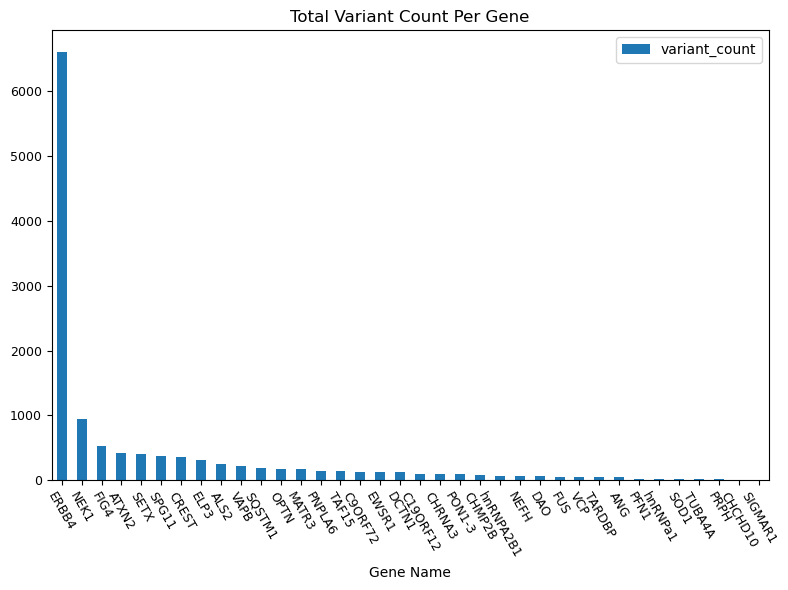

In [31]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [32]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'FIG4', 'ATXN2', 'SETX']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [33]:
df = pd.read_csv(infile)
df = df[genome_ids]


## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [34]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [35]:
hdf.reset_index(inplace=True)

In [36]:
hdf.head()

,index,count
0,HG01269,1076
1,HG01498,1119
2,HG01356,1128
3,HG01125,1528
4,HG01342,1736


In [37]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(np.float64(1281.9255319148936), 278.8957194936211)

## Find top and bottom genomes using mean & STD

In [38]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [39]:
len(top_genomes)

15

In [40]:
len(bottom_genomes)

14

In [41]:
df = pd.read_csv(infile)
df = df[genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [42]:
sdf.head()

,HG01269,HG01498,HG01356,HG01125,HG01342,HG01375,HG01383,HG01479,HG01447,HG01121,...,HG01374,HG01459,HG01113,HG01474,HG01462,HG01341,HG01124,HG01437,HG01492,HG01137
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,21,37,31,4,13,3,4,4,36,7,...,2,2,39,23,4,6,2,21,2,5
ANG,9,13,4,1,0,3,1,8,6,1,...,1,10,9,1,13,6,5,3,9,1
ATXN2,12,13,8,9,29,11,14,9,7,10,...,13,8,160,2,16,10,17,12,8,21
C19ORF12,5,12,8,16,8,9,12,9,8,13,...,18,1,11,11,11,4,13,17,6,17
C9ORF72,2,23,23,17,11,12,26,10,17,36,...,13,25,36,11,14,33,27,10,2,22


In [43]:
tgdf= sdf.loc[top_genes]

In [44]:
tgdf_top_genomes = tgdf[top_genomes]

In [45]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [46]:
tgdf_top_genomes.head()

,HG01342,HG01375,HG01447,HG01488,HG01369,HG01280,HG01485,HG01348,HG01456,HG01440,HG01486,HG01359,HG01134,HG01350,HG01495
gene,,,,,,,,,,,,,,,
ERBB4,1105,1186,1113,1018,1033,1036,1152,1026,1177,1290,1007,974,1322,1383,927
NEK1,109,217,197,195,324,186,9,191,10,42,197,212,226,6,193
FIG4,85,41,5,58,79,30,35,18,40,53,56,69,76,55,41
ATXN2,29,11,7,10,155,13,12,10,11,12,9,11,12,12,23
SETX,21,21,46,49,23,46,33,12,49,24,30,7,31,21,6


In [47]:
tgdf_bot_genomes.head()

,HG01345,HG01390,HG01432,HG01360,HG01455,HG01275,HG01130,HG01378,HG01122,HG01251,HG01374,HG01459,HG01341,HG01437
gene,,,,,,,,,,,,,,
ERBB4,261,372,586,362,574,434,582,259,351,452,378,399,280,613
NEK1,241,18,41,11,16,10,45,28,55,200,193,40,14,10
FIG4,48,54,55,58,54,59,102,84,30,40,35,83,51,38
ATXN2,12,10,8,10,9,8,11,7,10,23,13,8,10,12
SETX,6,20,6,55,7,26,9,30,12,10,11,50,37,25


## Plot stacked bar chart for top genes & top genomes

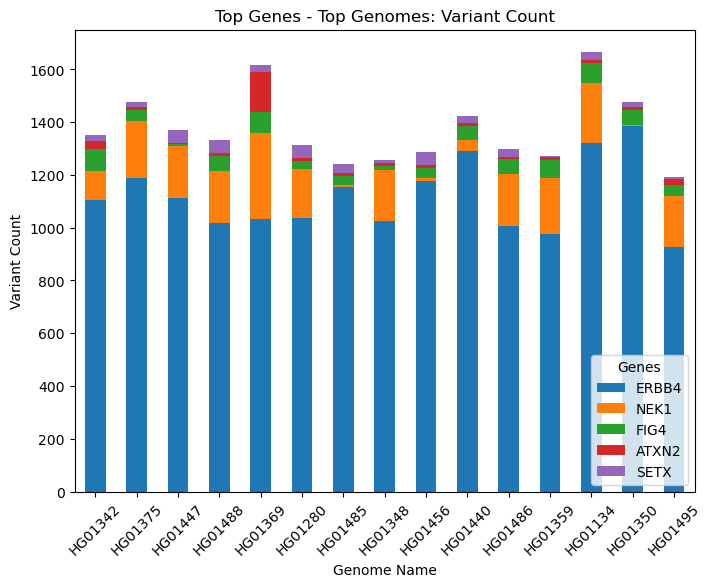

In [48]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

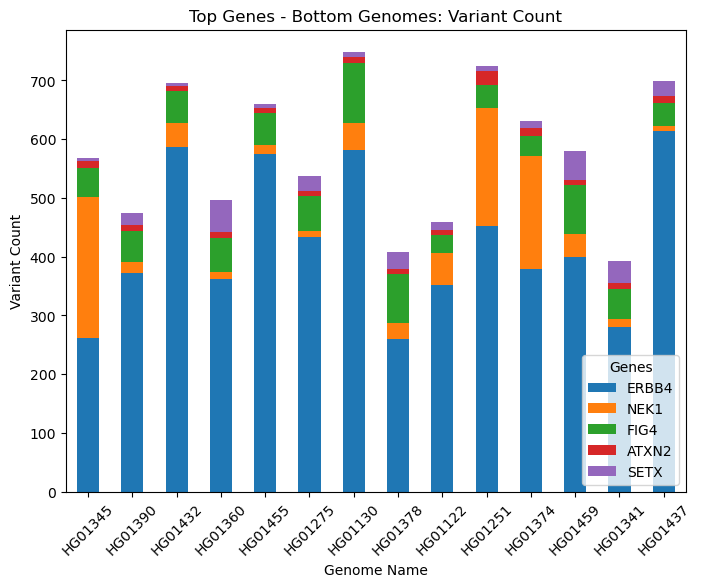

In [49]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()